# Assignment 2: Clustering

In [5]:
import pandas as pd
from sklearn.cluster import KMeans

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [6]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [7]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Task 1: clean the data and perform a basic EDA

In [8]:
data = data.dropna() #removing rows with NaN values, here less than 3% of the rows are removed
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8945  C19186    28.493517           1.000000     291.12              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717  

In [6]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [60]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


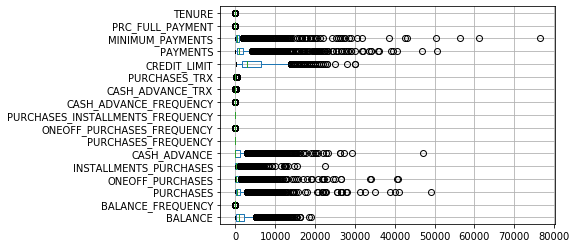

In [8]:
data.plot.box(vert=False, grid=True)

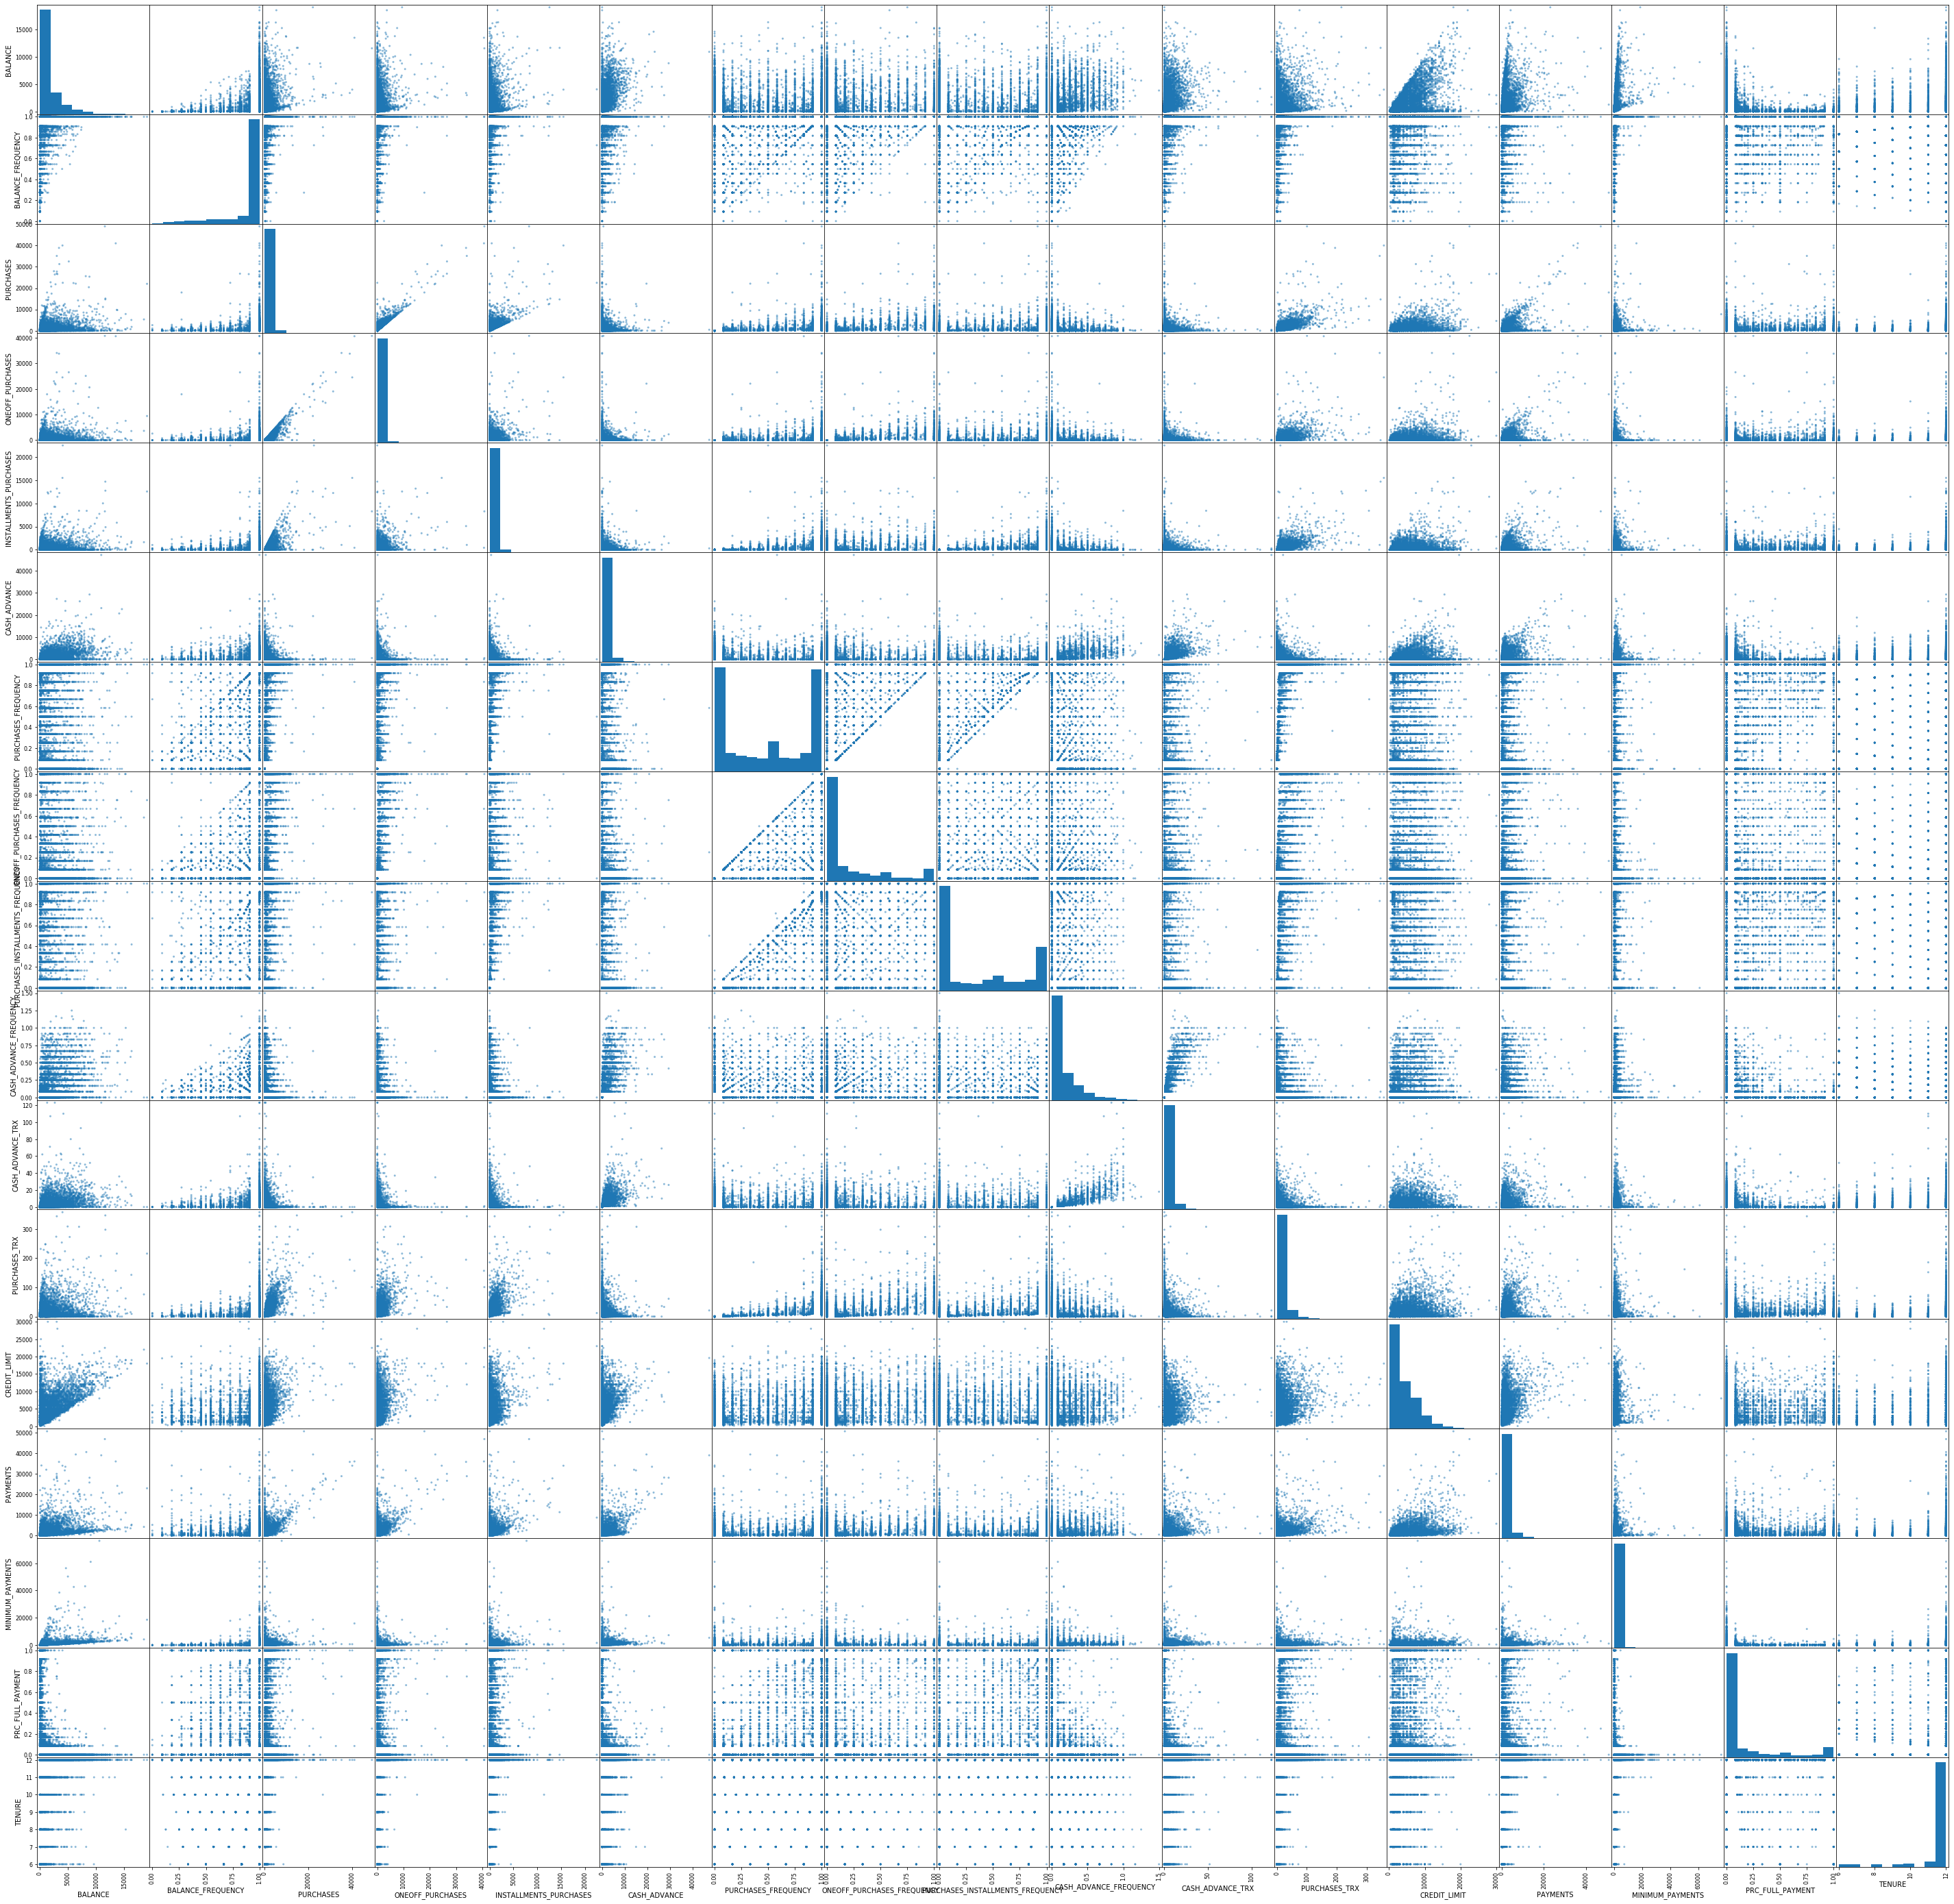

In [10]:
pd.plotting.scatter_matrix(data, figsize=(50,50));

### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these grpuops.
* use a Scikit-Learn clustering algorithm of your choice to group the users 
* analyze the key differences between the user groups

In [37]:
data['CLUSTER'] = KMeans().fit_predict(data.drop('CUST_ID', axis=1))
grouped_users = data.groupby(data['CLUSTER'])

In [107]:
#grouped_users['CREDIT_LIMIT'].describe()
grouped_users.mean()


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
CLUSTER                                                                   
0        5836.923585           0.957004   1605.074220        978.008119   
1         805.375419           0.874375    513.717966        249.586239   
2        5234.497152           0.885738   1443.694649        845.968772   
3        5448.201718           0.956126  27916.555652      22354.314348   
4         906.257454           0.885058   1231.492173        714.325800   
5        2396.226005           0.973313   6665.054080       4488.250245   
6        4438.237601           0.985258   1194.728378        172.967838   
7        3995.258965           0.958032    501.124479        274.606601   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CLUSTER                                                              
0                    627.219656   2186.051843             0.559353   
1                    264.446555    444.034349             0.457702   
2                    597.918860  10938.359442             0.357262   
3                   5562.241304    970.110470             0.905072   
4                    517.396276    223.460487             0.629821   
5                   2178.644325    530.020601             0.914682   
6                   1021.760541   1024.245606             0.512899   
7                    226.551984   3488.276287             0.311694   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CLUSTER                                                                 
0                          0.331372                          0.401008   
1                          0.133119                          0.351449   
2                          0.196234                          0.280227   
3                          0.850000                          0.708696   
4                          0.336818                          0.438281   
5                          0.704536                          0.713376   
6                          0.050368                          0.483006   
7                          0.130898                          0.215471   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CLUSTER                                                            
0                      0.227010          5.688073      23.188073   
1                      0.109278          2.224080       9.622687   
2                      0.503599         21.061404      18.342105   
3                      0.039855          1.782609     128.217391   
4                      0.049911          0.933011      19.404345   
5                      0.070622          1.911043      75.239264   
6                      0.086814          2.972973      23.027027   
7                      0.366392         10.060904       8.634578   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CLUSTER                                                                   
0        13517.775229   2656.663811       1857.154248          0.108735   
1         2117.181537    895.003141        529.705155          0.150766   
2        10810.964912  15327.022689       2092.402035          0.145335   
3        16043.478261  27761.600386       3345.718254          0.515316   
4         7058.048499   1468.123175        347.251405          0.246011   
5         8117.024540   6583.340137       1209.115559          0.324751   
6         4652.702703   1534.813466      27711.273916          0.000000   
7         6291.998571   2685.287015       1652.534473          0.028296   

            TENURE  
CLUSTER             
0        11.871560  
1        11.394229  
2        11.684211  
3        11.913043  
4        11.810501  
5        11.932515  
6        11.918919  
7        11.465619

In [48]:
grouped_users.max()

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CLUSTER                                                                         
0        C18437  18495.558550                1.0   10166.69           7564.81   
1        C19190   4104.710798                1.0    5065.83           4768.27   
2        C19098  14581.459140                1.0   12551.95          10901.24   
3        C17237  19043.138560                1.0   49039.57          40761.25   
4        C19013   5022.775729                1.0    5671.86           4674.21   
5        C18987  11642.601560                1.0   22500.00          14215.00   
6        C18961  11209.370760                1.0   11147.33           2463.00   
7        C19182   9321.555794                1.0    4767.11           4139.56   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CLUSTER                                                              
0                       6866.69  12702.427700                  1.0   
1                       4249.92   5676.779668                  1.0   
2                       8409.93  47137.211760                  1.0   
3                      15497.19  19513.474830                  1.0   
4                       4538.84   4058.539188                  1.0   
5                      22500.00   7540.307350                  1.0   
6                      10009.93  10616.270140                  1.0   
7                       4059.93  11220.766360                  1.0   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CLUSTER                                                                 
0                          1.000000                               1.0   
1                          1.000000                               1.0   
2                          1.000000                               1.0   
3                          1.000000                               1.0   
4                          1.000000                               1.0   
5                          1.000000                               1.0   
6                          0.333333                               1.0   
7                          1.000000                               1.0   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CLUSTER                                                            
0                      1.125000                93            216   
1                      1.000000                62            186   
2                      1.000000               123            308   
3                      0.666667                35            358   
4                      0.916667                44            232   
5                      0.833333                40            347   
6                      0.363636                17            162   
7                      1.500000               123            195   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CLUSTER                                                                   
0             30000.0  11717.307940       9827.045323               1.0   
1              4800.0   9724.871142      13916.702900               1.0   
2             21000.0  40627.595240      21235.065300               1.0   
3             30000.0  50721.483360      18621.013310               1.0   
4             13500.0   7684.307278       5583.630482               1.0   
5             23000.0  16826.424430      13621.708390               1.0   
6             11000.0   8735.607835      76406.207520               0.0   
7             10500.0  12902.188130      14437.122090               1.0   

         TENURE  
CLUSTER          
0            12  
1            12  
2            12  
3            12  
4            12  
5            12  
6            12  
7            12

In [49]:
grouped_users.min()


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CLUSTER                                                                        
0        C10019     1.059425           0.090909       0.00              0.00   
1        C10001     0.000000           0.000000       0.00              0.00   
2        C10024     4.382924           0.090909       0.00              0.00   
3        C10144  1268.809031           0.272727   17409.21           9449.07   
4        C10003     0.000000           0.000000       0.00              0.00   
5        C10007    12.659909           0.272727    1368.70              0.00   
6        C10035  1418.254924           0.727273       0.00              0.00   
7        C10002     8.640998           0.181818       0.00              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CLUSTER                                                              
0                           0.0           0.0             0.000000   
1                           0.0           0.0             0.000000   
2                           0.0           0.0             0.000000   
3                           0.0           0.0             0.166667   
4                           0.0           0.0             0.000000   
5                           0.0           0.0             0.083333   
6                           0.0           0.0             0.000000   
7                           0.0           0.0             0.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CLUSTER                                                                 
0                          0.000000                               0.0   
1                          0.000000                               0.0   
2                          0.000000                               0.0   
3                          0.166667                               0.0   
4                          0.000000                               0.0   
5                          0.000000                               0.0   
6                          0.000000                               0.0   
7                          0.000000                               0.0   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CLUSTER                                                            
0                           0.0                 0              0   
1                           0.0                 0              0   
2                           0.0                 0              0   
3                           0.0                 0              3   
4                           0.0                 0              0   
5                           0.0                 0              2   
6                           0.0                 0              0   
7                           0.0                 0              0   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CLUSTER                                                                   
0              8500.0     31.845894         22.081988               0.0   
1                50.0      0.049513          0.019163               0.0   
2              1200.0   5574.916601         16.950090               0.0   
3              7500.0  13002.303930        410.800069               0.0   
4              4000.0      4.523555          0.117036               0.0   
5              1000.0    508.797444         29.259869               0.0   
6              1000.0     46.969049      15584.097420               0.0   
7              1400.0    138.855523          5.045387               0.0   

         TENURE  
CLUSTER          
0             6  
1             6  
2             6  
3            10  
4             6  
5             6  
6            11  
7             6

In [50]:
grouped_users.median()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CLUSTER                                                                
0        5981.254574                1.0     985.17           401.645   
1         607.200060                1.0     262.44             0.000   
2        5042.369329                1.0     120.12             0.000   
3        3391.702180                1.0   26402.39         21802.600   
4         360.671491                1.0     899.73           395.000   
5        1677.117997                1.0    5842.06          3990.975   
6        3517.101616                1.0     419.64             0.000   
7        3988.995507                1.0      99.75             0.000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CLUSTER                                                              
0                       176.525   1074.110486             0.636364   
1                        70.980      0.000000             0.416667   
2                         0.000  10215.675890             0.087121   
3                      4924.710      0.000000             1.000000   
4                       250.000      0.000000             0.750000   
5                      1538.720      0.000000             1.000000   
6                       305.780      0.000000             0.583333   
7                         0.000   3180.013233             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CLUSTER                                                                 
0                          0.166667                          0.333333   
1                          0.000000                          0.166667   
2                          0.000000                          0.000000   
3                          1.000000                          0.916667   
4                          0.166667                          0.416667   
5                          0.750000                          0.916667   
6                          0.000000                          0.583333   
7                          0.000000                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CLUSTER                                                            
0                      0.166667                 2             12   
1                      0.000000                 0              6   
2                      0.500000                16              2   
3                      0.000000                 0            101   
4                      0.000000                 0             12   
5                      0.000000                 0             64   
6                      0.000000                 0             12   
7                      0.333333                 7              1   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CLUSTER                                                                   
0             13000.0   2126.246740       1604.666704          0.000000   
1              2000.0    568.449970        237.276808          0.000000   
2             10500.0  13035.395685       1594.726710          0.083333   
3             17000.0  26557.097240       1149.747342          0.583333   
4              6500.0   1077.230161        195.306688          0.000000   
5              7500.0   5913.775478        531.410205          0.083333   
6              4000.0    518.300462      24302.098190          0.000000   
7              6000.0   1648.435527       1268.607345          0.000000   

         TENURE  
CLUSTER          
0            12  
1            12  
2            12  
3            12  
4            12  
5            12  
6            12  
7            12

In [96]:
groups=dict(list(grouped_users))
groups.keys()
#Now we can look at the correlation differences between groups
#Nothing is displayed when a for loop is used, so the groups are displayed separately:
groups[0].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [97]:
groups[1].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [98]:
groups[2].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [99]:
groups[3].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [101]:
groups[4].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [102]:
groups[5].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [103]:
groups[6].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

/home/student/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/student/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/student/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [104]:
groups[7].drop('CLUSTER', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [ ]:
'''
As expected, we can see different behaviors. 
For example, a "cluster 6" card user will most likely use "installments purchases"
compared to a "cluster 3" card user (wich will most likely use "oneoff purchases").
'''
